factor analysis begin:  Factor_DailyReturns
analysis factor/portfolio:  False/True
long-short/group neutral:  True/False
strategy:  eq_weight optimize:  max_sharpe
simulation_time:                 0
start 2014-01-01
end   2015-01-01
use_storage_data:  True
Dropped 24.2% entries from factor data: 24.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 50.0%, not exceeded: OK!
        factors:  (251880, 2)
         prices:  (252, 1329)
     pf_returns:  (356,)
   pf_positions:  (356, 1001)
pf_transactions:  (3403, 8)
   pf_benchmark:  (350,)
DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-11',
               ...
               '2014-12-14', '2014-12-15', '2014-12-16', '2014-12-17',
               '2014-12-18', '2014-12-19', '2014-12-20', '2014-12-21',
               '2014-12-22', '

,All,In-sample,Out-of-sample
Annual return,0.4%,nan%,0.4%
Cumulative returns,0.6%,nan%,0.6%
Annual volatility,1.2%,nan%,1.2%
Sharpe ratio,0.38,NaN,0.38
Calmar ratio,0.19,NaN,0.19
Stability,0.34,NaN,0.34
Max drawdown,-2.3%,nan%,-2.3%
Omega ratio,1.09,NaN,1.09
Sortino ratio,0.53,NaN,0.53
Skew,-0.25,NaN,-0.25


TypeError: Empty 'DataFrame': no numeric data to plot

saved:  Factor_DailyReturns


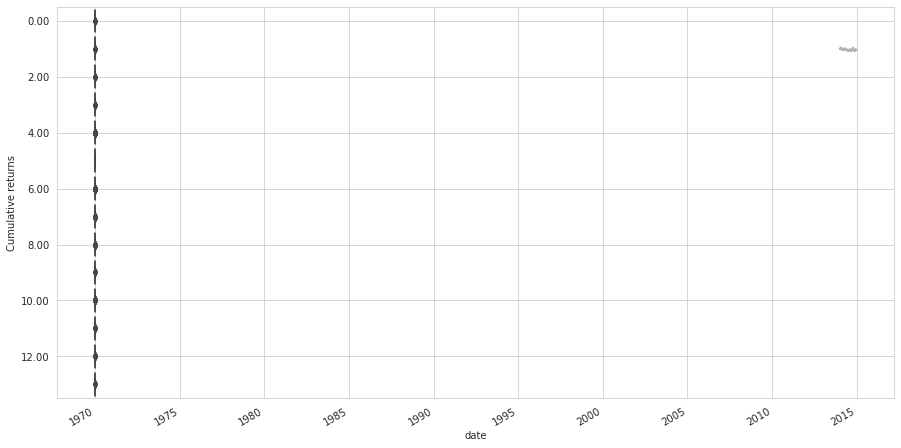

In [127]:
from IPython.display import Javascript, clear_output
from nbconvert import HTMLExporter
import time
import os

def save_notebook(name):
    display(
        Javascript("IPython.notebook.save_notebook()"),
        include=['application/javascript']
    )
    print("saved: ", name)

def output_HTML(read_file, output_file):
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    try:
        os.remove(output_file)
    except OSError as e:
        pass
    file = codecs.open(output_file, 'w', encoding='utf-8')
    file.write(output)
    file.close()

import factors
import inspect
n = 0
regression=False; N = 1 # run particular factor/ regression
for name, obj in inspect.getmembers(factors, predicate=inspect.isclass):
    if obj.__module__ == "factors":
        if n==N or regression==True:
            clear_output(wait=True)
            time.sleep(1)
            %run -i backtest.py {name} 
            time.sleep(3)
            save_notebook(name)
            time.sleep(1)
            current_file = 'regression.ipynb'
            output_file = f'results/factor_{name}.html'
            output_HTML(current_file, output_file)
        n = n+1